*Perceptron* берет тот двойной ответ (как результат классификации) и вычисляет ошибку, используемую, чтобы обновить веса<br>Adaline использует непрерывную стоимость ответа, чтобы обновить веса
 
Первым шагом в этих двух алгоритмах является вычисление чистого входного сигнала `net_input`,<br> как линейной комбинации  `признаков x` и весов модели `w` <br>$ net\_input = w^T*x$

Затем, в Персептроне и Адалине, мы определяем пороговую функцию, чтобы сделать прогноз.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from perceptron import Perceptron
from adaline_gd import AdalineGD
from adaline_sgd import AdalineSGD
from logisticRegressionGD import LogisticRegressionGD

df = pd.read_csv('iris.csv')

In [2]:
X = df.iloc[0:100, [2, 3]].values

y_raw = df.iloc[0:100, 4].values
y = np.where(y_raw == 'Iris-setosa', -1, 1)
             
# для обучения adaline нужна стандартизация данных
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [30]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
# обучение 2 видов adaline
ada_gd = AdalineGD(eta=0.001, n_iter=25)
ada_gd.fit(X_std, y)

ada_sgd = AdalineSGD(eta=0.001, n_iter=25) 
ada_sgd.fit(X_std, y)

ada_sgd = AdalineSGD(eta=0.001, n_iter=25) 
ada_sgd.fit(X_std, y)

lrgd = LogisticRegressionGD(eta=0.05, n_iter=25, random_state=42)
y_lr =  np.where(y_raw == 'Iris-setosa', 1, 0)
lrgd.fit(X, y_lr);

# графики ошибок

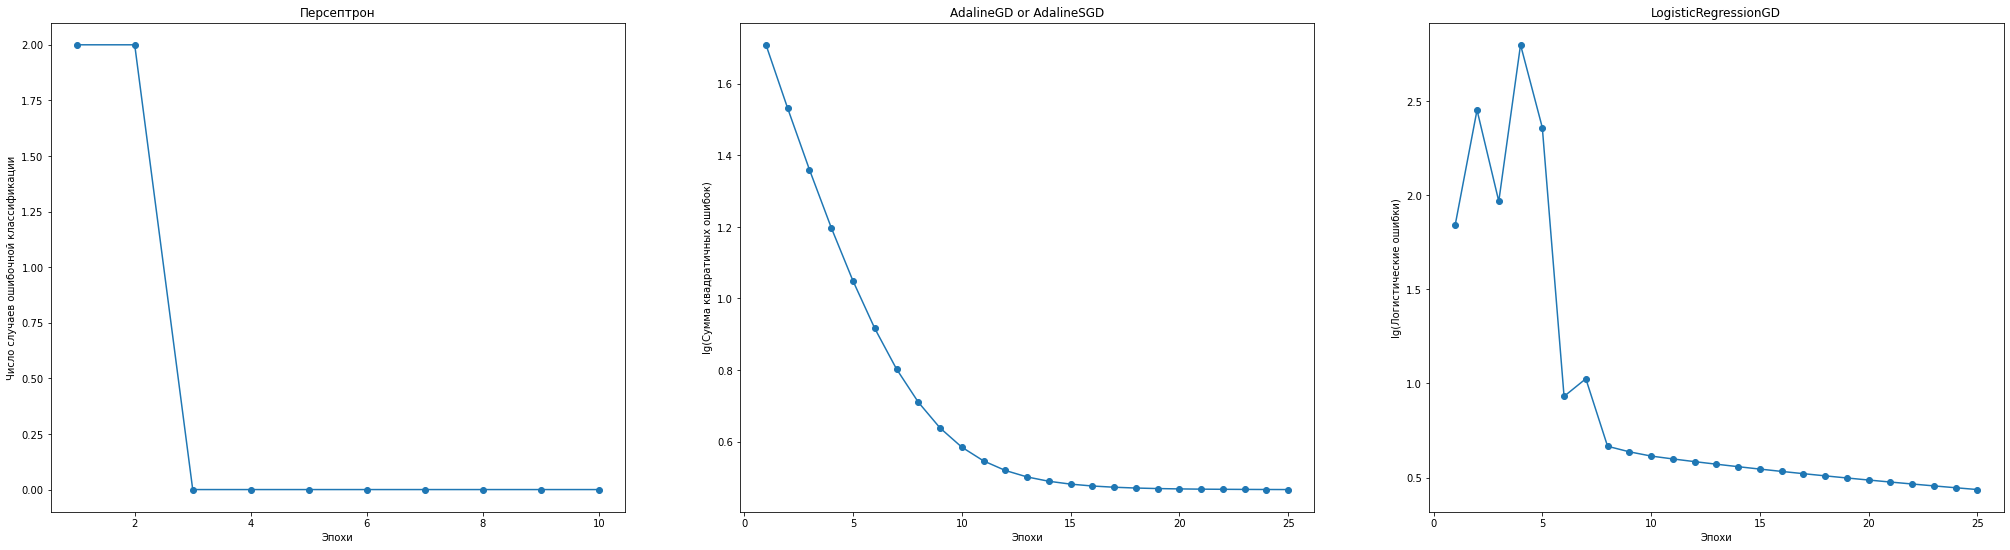

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(35, 9), )
ax[0].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('Число случаев ошибочной классификации')
ax[0].set_title('Персептрон')

ax[1].plot(range(1, len(ada_gd.cost_) + 1), np.log10(ada_gd.cost_), marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('lg(Сумма квадратичных ошибок)')
ax[1].set_title('AdalineGD or AdalineSGD')

#ax[2].plot(range(1, len(ada_sgd.cost_) + 1), np.log10(ada_sgd.cost_), marker='o')
#ax[2].set_xlabel('Эпохи')
#ax[2].set_ylabel('lg(Сумма квадратичных ошибок)')
#ax[2].set_title('AdalineSGD');

ax[2].plot(range(1, len(ada_sgd.cost_) + 1), np.log10(lrgd.cost_), marker='o')
ax[2].set_xlabel('Эпохи')
ax[2].set_ylabel('lg(Логистические ошибки)')
ax[2].set_title('LogisticRegressionGD');

# результаты алгоритмов

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):
    """график областей решения"""
    from matplotlib.colors import ListedColormap
    if ax is None:
        ax = plt.gca()
        
    markers = ('o', '^', 's', 'X', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # выводим поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # находим минимум и максимум для 1 признака
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # находим минимум и максимум для 2 признака
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  # получаем матрицу координат

    # идентифицируем метки классов и преобразуем в матрицу с размерностями как у xx1 и xx2
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

   # рисуем контурный график
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    # для вывода объектов
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    cmap=cmap(idx+1),
                    marker=markers[idx],
                    label=cl)

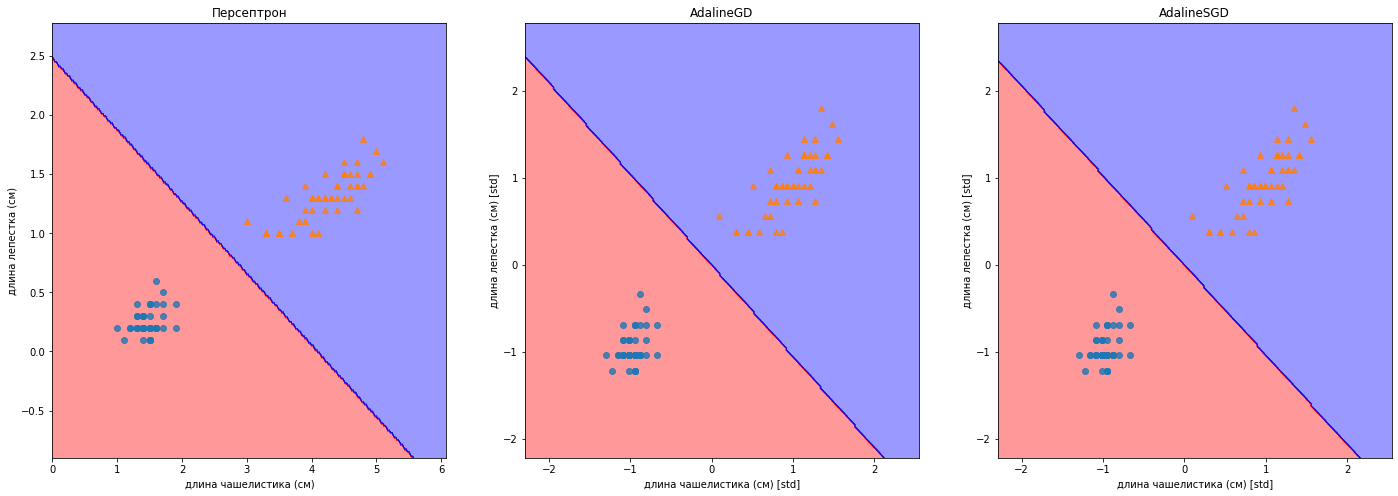

In [6]:
plt.close(fig)
fig, ax = plt.subplots(1, 3, figsize=(24, 8))
plot_decision_regions(X, y, ppn, ax=ax[0])
ax[0].set_xlabel('длина чашелистика (см)')
ax[0].set_ylabel('длина лепестка (см)')
ax[0].set_title('Персептрон')

plot_decision_regions(X_std, y, ada_gd, ax=ax[1])
ax[1].set_xlabel('длина чашелистика (см) [std]')
ax[1].set_ylabel('длина лепестка (см) [std]')
ax[1].set_title('AdalineGD')

plot_decision_regions(X_std, y, ada_sgd, ax=ax[2])
ax[2].set_xlabel('длина чашелистика (см) [std]')
ax[2].set_ylabel('длина лепестка (см) [std]')
ax[2].set_title('AdalineSGD');

